# Music Genre Classification

In [2]:
!pip install --upgrade gdown
!gdown 1-4elQY1C-n23u3QqomnLiI9CN9iPrWC3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloading...
From: https://drive.google.com/uc?id=1-4elQY1C-n23u3QqomnLiI9CN9iPrWC3
To: /content/genres.tar.gz
100% 1.23G/1.23G [00:23<00:00, 52.2MB/s]


In [3]:
!tar -xzf genres.tar.gz

In [ ]:
from pathlib import Path

data_dir = Path('genres/')
wav_fns = list(data_dir.rglob('*.wav'))
wav_fns.sort()
wav_fns

In [14]:
# generator와 list 차이
# wav_gen = data_dir.rglob('*.wav')
for wav in wav_gen:
  print(wav)

In [15]:
wav_fns[:10]

[PosixPath('genres/blues/blues.00000.wav'),
 PosixPath('genres/blues/blues.00001.wav'),
 PosixPath('genres/blues/blues.00002.wav'),
 PosixPath('genres/blues/blues.00003.wav'),
 PosixPath('genres/blues/blues.00004.wav'),
 PosixPath('genres/blues/blues.00005.wav'),
 PosixPath('genres/blues/blues.00006.wav'),
 PosixPath('genres/blues/blues.00007.wav'),
 PosixPath('genres/blues/blues.00008.wav'),
 PosixPath('genres/blues/blues.00009.wav')]

# read audio

In [16]:
import torchaudio
import IPython.display as ipd

wav_fn = wav_fns[0]
y, sr = torchaudio.load(wav_fn)

In [19]:
sr, y.shape, y.shape[1] / sr

(22050, torch.Size([1, 661794]), 30.013333333333332)

In [23]:
sr
y.shape

torch.Size([1, 661794])

In [ ]:
ipd.display(ipd.Audio(y, rate=sr))
ipd.display(ipd.Audio(wav_fns[1]))

In [ ]:
# CD 1장 ~= 700 MB, 70분/ 16bit 44.1kHz


In [33]:
??torchaudio.transforms.AmplitudeToDB

In [42]:
??torchaudio.transforms.MelScale

In [66]:
import torch
n_fft=1024
spec_converter = torchaudio.transforms.Spectrogram(n_fft=n_fft)
mel_converter = torchaudio.transforms.MelScale(sample_rate=22050, f_max=11025, n_stft=n_fft//2+1)
db_converter = torchaudio.transforms.AmplitudeToDB()

spec = spec_converter(y)

# db_spec = db_converter(spec)
db_spec = torch.log(spec)

In [62]:
mel_converter.f_min, mel_converter.n_mels

(0.0, 128)

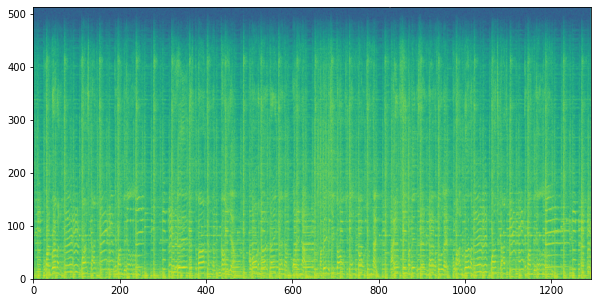

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.imshow(db_spec[0], aspect='auto', origin='lower')

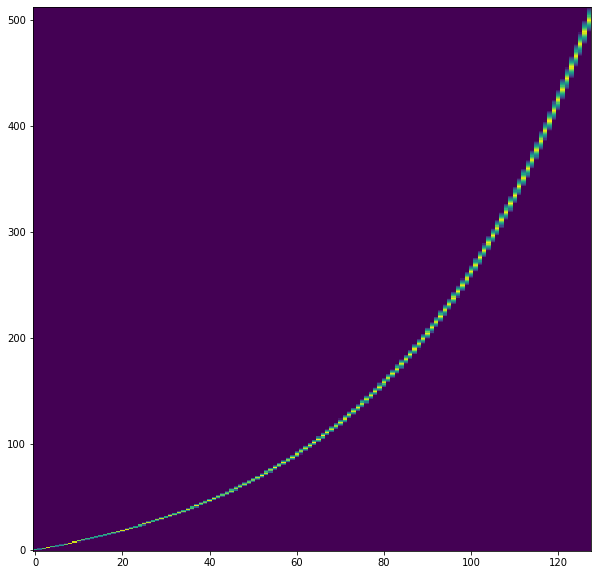

In [67]:
plt.figure(figsize=(10,10))
plt.imshow(mel_converter.fb, aspect='auto', origin='lower', interpolation='nearest')

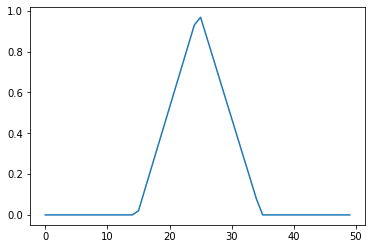

In [70]:
plt.plot(mel_converter.fb[400:450,120])

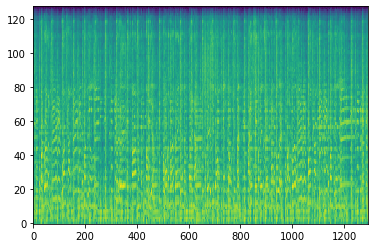

In [73]:
mel_spec = mel_converter(spec)
mel_db_spec = db_converter(mel_spec)

plt.imshow(mel_db_spec[0], aspect='auto', origin='lower', interpolation='nearest')

In [77]:
# torch.set_printoption(sci_mode=False)
spec

tensor([[[2.1072e+01, 1.0069e+00, 1.2462e+00,  ..., 3.0329e+00,
          2.3376e-01, 7.9152e+01],
         [3.1707e+01, 5.8799e+00, 4.6018e+00,  ..., 6.9395e+00,
          2.7755e-01, 1.1763e+02],
         [1.7526e+01, 2.1955e+01, 2.1111e+01,  ..., 4.9722e+01,
          3.9515e+01, 2.7733e+02],
         ...,
         [7.1307e-05, 8.2936e-09, 7.4540e-09,  ..., 5.5593e-08,
          3.5961e-10, 3.0495e-05],
         [6.5979e-05, 2.2669e-08, 1.1436e-09,  ..., 1.0469e-08,
          6.3331e-08, 3.0269e-05],
         [6.2682e-05, 3.9870e-10, 2.3309e-09,  ..., 1.0123e-08,
          1.4869e-07, 2.8237e-05]]])

In [78]:
db_spec

tensor([[[ 3.0479e+00,  6.8847e-03,  2.2012e-01,  ...,  1.1095e+00,
          -1.4535e+00,  4.3714e+00],
         [ 3.4565e+00,  1.7715e+00,  1.5265e+00,  ...,  1.9372e+00,
          -1.2818e+00,  4.7675e+00],
         [ 2.8637e+00,  3.0890e+00,  3.0498e+00,  ...,  3.9064e+00,
           3.6767e+00,  5.6252e+00],
         ...,
         [-9.5485e+00, -1.8608e+01, -1.8715e+01,  ..., -1.6705e+01,
          -2.1746e+01, -1.0398e+01],
         [-9.6262e+00, -1.7602e+01, -2.0589e+01,  ..., -1.8375e+01,
          -1.6575e+01, -1.0405e+01],
         [-9.6774e+00, -2.1643e+01, -1.9877e+01,  ..., -1.8408e+01,
          -1.5721e+01, -1.0475e+01]]])